In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns


## Reading [Smoke Detection](https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset/) dataset

[Real-time Smoke Detection with AI-based Sensor Fusion](https://www.hackster.io/stefanblattmann/real-time-smoke-detection-with-ai-based-sensor-fusion-1086e6)



In [47]:
smoke_train = pd.read_csv("../lab1/smoke_detection_iot.csv")
smoke_train.shape

(62630, 16)

In [48]:
smoke_train.head()

,Index,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [49]:
# доступні нам колонки
print(smoke_train.keys())

Index(['Index', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')


In [50]:
smoke_train.dropna(how="any")
smoke_train.shape
# жодна ізз колонок не буде дропнута

(62630, 16)

In [51]:
smoke_train.isnull().sum()


Index             0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [52]:
smoke_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [53]:
# змінимо усі типи колонок на float64
smoke_train['Index'] = smoke_train['Index'].astype(float)
smoke_train['UTC'] = smoke_train['UTC'].astype(float)
smoke_train['TVOC[ppb]'] = smoke_train['TVOC[ppb]'].astype(float)
smoke_train['eCO2[ppm]'] = smoke_train['eCO2[ppm]'].astype(float)
smoke_train['Raw H2'] = smoke_train['Raw H2'].astype(float)
smoke_train['Raw Ethanol'] = smoke_train['Raw Ethanol'].astype(float)
smoke_train['CNT'] = smoke_train['CNT'].astype(float)
smoke_train['Fire Alarm'] = smoke_train['Fire Alarm'].astype(float)

## PCA

**PCA (Principal Component Analysys)** або Метод Головних Компонент -- це метод зменешення розмірності даних, який зберігає максимальну кількість інформації. Додам, що цей метод використовується для:
  * зменшення розмірності даних у наборі даних без втрат;
  * ідентифікації груп;
  * передбаченння певнинх фактів.  

In [54]:
X = smoke_train
y = smoke_train['Fire Alarm']

In [55]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [56]:
pca = PCA()
X_pca = pca.fit_transform(X_std)

In [57]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

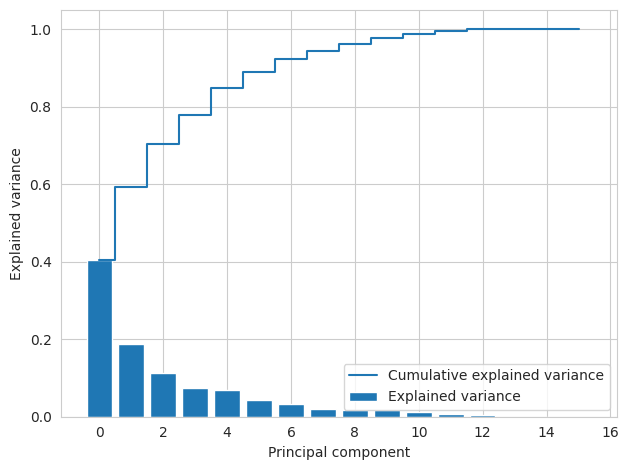

In [58]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

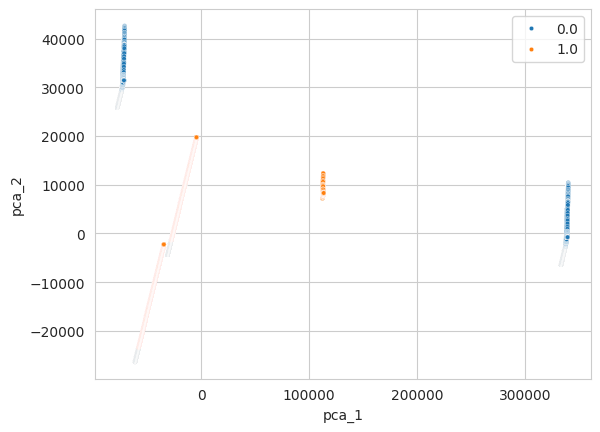

In [61]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
ax.legend()

## tSNE

**tSNE (t-distributed Stochastic Neighbor Embedding)** -- є методом зменшення розмірності даних, що може зберігати ієрархічну структуру даних, яка може бути порушена у лінійних методах (попередній PCA). Саме цей метод є корисним там, де важливо зберегти структуру даних.


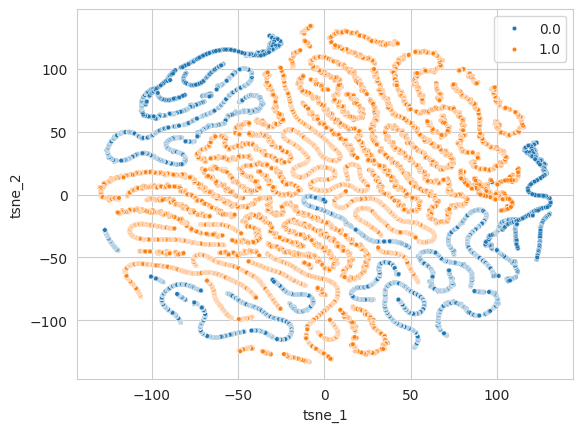

In [60]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
ax.legend()

У результаті саме на моєму сеті диних вийшло класифікувати як лінійним(PCM) так і нелінійним(tSNE) та виділити 2 кластери, де один(0.0) позначає те, що ми не маємо пожежі, а інший(1.0) протилежне.